In [8]:
# importing pacakges

import matplotlib.pyplot as plt

import pandas as pd 

import numpy as np

from scipy import optimize

plt.style.use('fivethirtyeight')

### Q1) Scipy: We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.
Task:
1.fitting it to the periodic function
2.plot the fit
Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

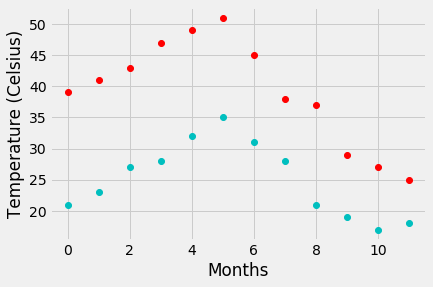

In [14]:
# create data

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
month = np.arange(12)

plt.plot(month , temp_max , 'ro')
plt.plot(month , temp_min , 'co')
plt.xlabel('Months')
plt.ylabel('Temperature (Celsius)')
plt.show()

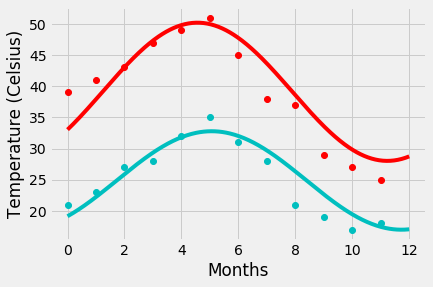

In [16]:
# fitting and plotting

def yearly_temps(times, avg, ampl, time_offset):
    return (avg+ampl*np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max , cov_max = optimize.curve_fit(yearly_temps , month , temp_max , [40 , 20 , 0])
res_min , cov_min = optimize.curve_fit(yearly_temps , month , temp_min , [-40 , 20 , 0])

days = np.linspace(0,12,365)

plt.figure()
plt.plot(month , temp_max , 'ro')
plt.plot(month , temp_min , 'co')
plt.plot(days , yearly_temps(days, *res_max) , '-r')
plt.plot(days , yearly_temps(days, *res_min) , '-c')
plt.xlabel('Months')
plt.ylabel('Temperature (Celsius)')
plt.show()

### Q2) Titanic: Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gende

In [11]:
# loading titanic dataset

titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')

titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Text(0.5, 1.0, 'Male and Female proportions in data')

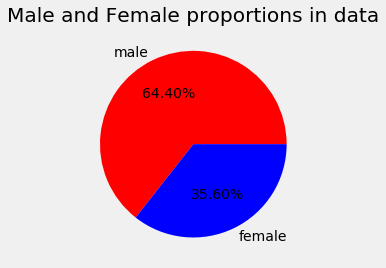

In [34]:
# pie chart 

count = titanic['sex'].value_counts()

plt.pie(count , labels = count.index.values.tolist(), colors = ['r','b'] , autopct = '%.2f%%' )

plt.title('Male and Female proportions in data')

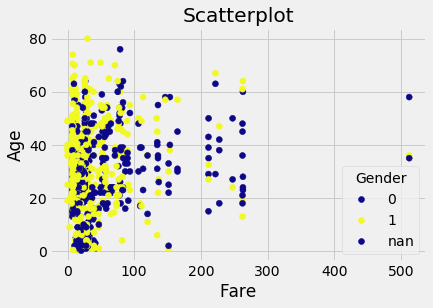

In [47]:
# scatter plot

titanic['gender']=titanic['sex'].map({'male':1,'female':0})

scat=plt.scatter(titanic['fare'] , titanic['age'] , c=titanic['gender'],cmap='plasma')

plt.title('Scatterplot')
plt.xlabel('Fare')
plt.ylabel('Age')

plt.legend(*scat.legend_elements(),title='Gender')